In [61]:
# Import modules
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [62]:
# 1. Global methane levels from 2002
# Open the dataset
ds = xr.open_dataset("200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc", engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:                  (time: 210, bnds: 2, lat: 36, lon: 72, pressure: 10)
Coordinates:
  * time                     (time) datetime64[ns] 2003-01-16T12:00:00 ... 20...
  * lat                      (lat) float64 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * lon                      (lon) float64 -177.5 -172.5 -167.5 ... 172.5 177.5
Dimensions without coordinates: bnds, pressure
Data variables:
    time_bnds                (time, bnds) datetime64[ns] ...
    lat_bnds                 (lat, bnds) float64 ...
    lon_bnds                 (lon, bnds) float64 ...
    pre                      (pressure) float64 ...
    pre_bnds                 (pressure, bnds) float64 ...
    land_fraction            (lat, lon) float64 ...
    xch4                     (time, lat, lon) float32 ...
    xch4_nobs                (time, lat, lon) float64 ...
    xch4_stderr              (time, lat, lon) float32 ...
    xch4_stddev              (time, lat, lon) float32 ...
    column_averaging_kernel  (time, pressure, lat, lon) float32 ...
    vmr_profile_ch4_apriori  (time, pressure, lat, lon) float32 ...
Attributes: (12/28)
    activity_id:            obs4MIPs
    comment:                Since long time, climate modellers use ensemble a...
    contact:                Maximilian Reuter (maximilian.reuter@iup.physik.u...
    Conventions:            CF-1.7 ODS-2.1
    creation_date:          2021-02-05T09:48:47Z
    data_specs_version:     2.1.0
    ...                     ...
    source_version_number:  v4.3
    title:                  C3S XCH4 v4.3
    tracking_id:            892d184a-7b35-4bba-836a-94b9cfeb360e
    variable_id:            xch4
    variant_info:           Best Estimate
    variant_label:          BE

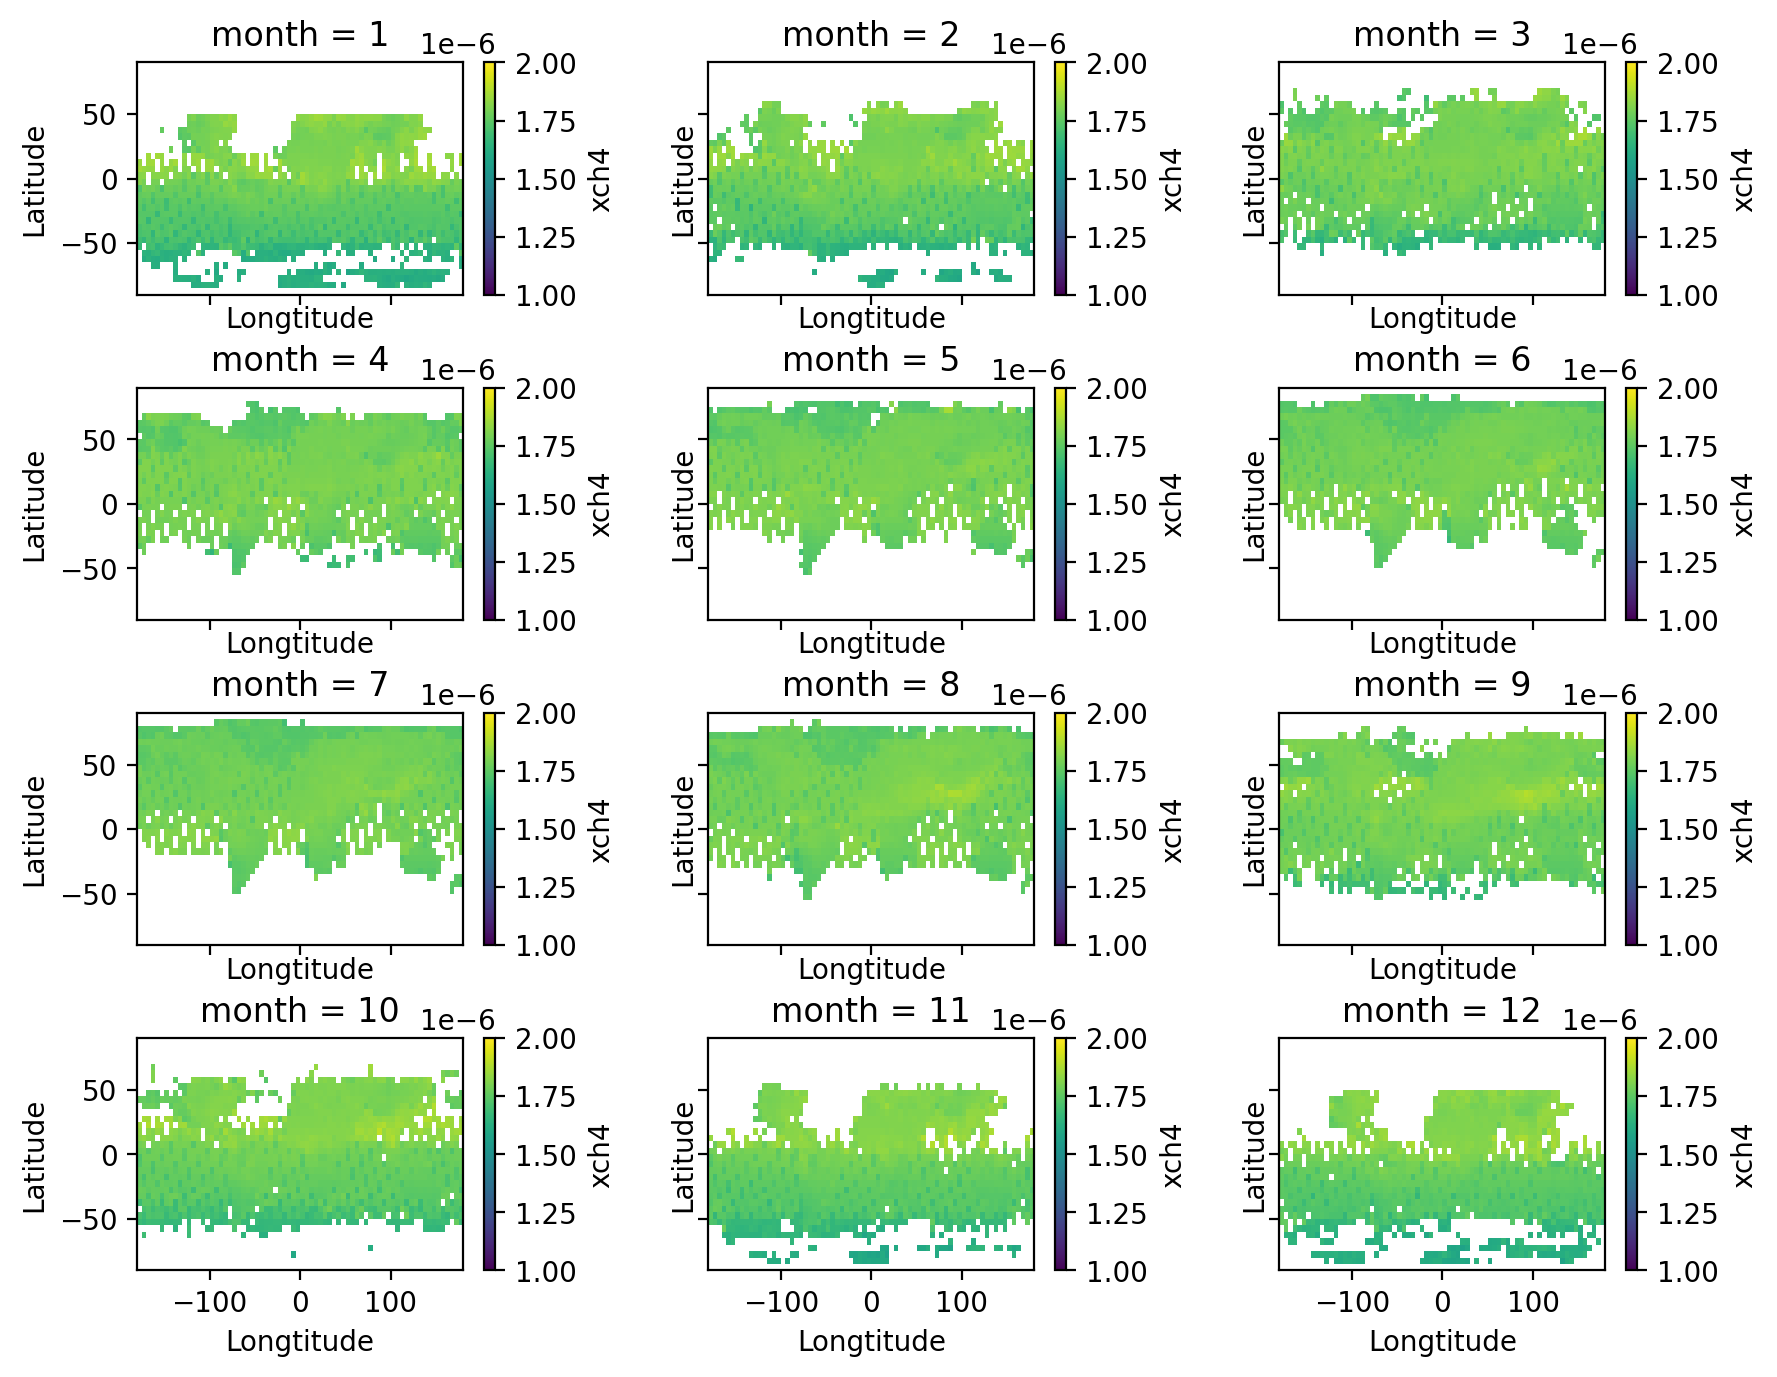

In [63]:
# 1.1 Compute methane climatology for each month, and plot your results in 12 panels.
# Compute the global average methane climatology groupby "Month"
xch4_month_mean = ds.xch4.groupby("time.month").mean()
# Subplot the figures in 4 rows and 3 columns
fig,ax=plt.subplots(4,3, figsize=(10,8),sharex="all",sharey="all",dpi=200)
ax=ax.flatten()
# Use a "for" loop to subplot the panels month by month
for i in range(12):
    ax[i]=plt.subplot(4,3,i+1)
    xch4_month_mean[i,:,:].plot(vmin=0.000001, vmax=0.000002)
    plt.xlabel("Longtitude",fontsize=10)
    plt.ylabel("Latitude",fontsize=10)
plt.subplots_adjust(wspace=0.4,hspace=0.4)

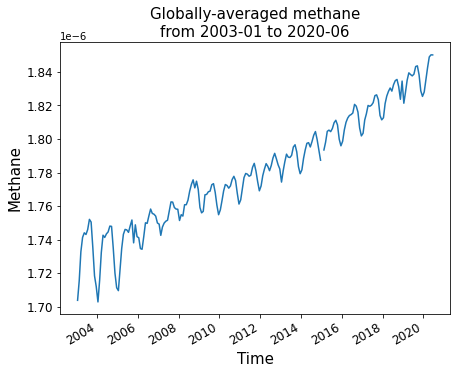

In [64]:
# 1.2 Plot globally-averaged methane from 2003-01 to 2020-06 as a time series. 
# Compute the globally averaged methane and plot the data from 2003-01 to 2020-06,
# without considering the cosine of latitude weights
ds.xch4.mean(dim=('lon', 'lat')).sel(time=slice("2003-01", "2020-06")).plot(figsize=(7,5))
plt.title("Globally-averaged methane\nfrom 2003-01 to 2020-06",fontsize=15)
plt.xlabel("Time",fontsize=15)
plt.ylabel("Methane",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

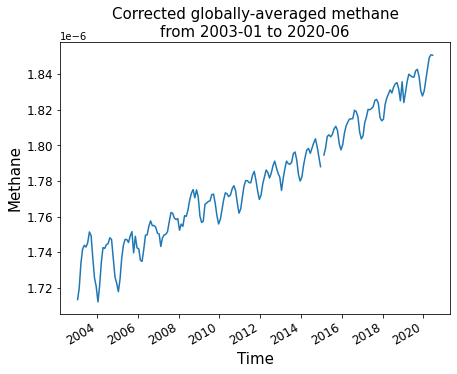

In [65]:
# 1.2 connected above
# Take the cosine of latitude weights into consideration and create a parameter "weights"
weights = np.cos(np.deg2rad(ds.lat))
# Use the function weighted() to recalculate xch4 distribution globally
xch4_weighted = ds.xch4.weighted(weights)
# Compute the globally averaged weighted methane and plot it
xch4_weighted.mean(dim=('lon', 'lat')).plot(figsize=(7,5))
plt.title("Corrected globally-averaged methane\nfrom 2003-01 to 2020-06",fontsize=15)
plt.xlabel("Time",fontsize=15)
plt.ylabel("Methane",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
### From the figure above and below, it is obvious to find out an increasing trend of methane from 2003-01 to 2020-06.

D:\Users\60918\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
D:\Users\60918\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


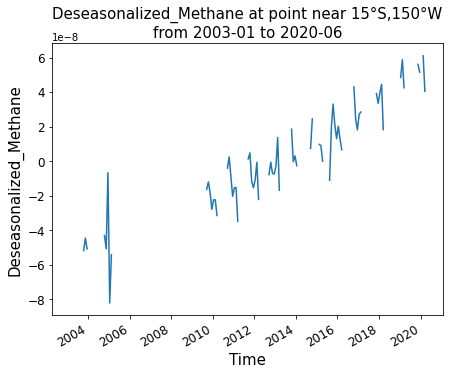

In [66]:
# 1.3 Plot deseasonalized methane levels at point [15°S, 150°W] from 2003-01 to 2020-06 as a time series.
# Select the xch4 data for the given point
S15_W150=ds.xch4.sel(lon=-150,lat=-15,method="nearest")
# Create a parameter of "group_data" to group the xch4 by "month"
group_data=S15_W150.sel(time=slice("2003-01","2020-06")).groupby("time.month")
# Apply function mean() to group_data, and subtract the mean value of each month to calculate Deseasonalized_Methane
Deseasonalized_Methane = group_data - group_data.mean(dim="time")
# Plot the Deseasonalized_Methane
Deseasonalized_Methane.plot(figsize=(7,5))
plt.title("Deseasonalized_Methane at point near 15°S,150°W\nfrom 2003-01 to 2020-06",fontsize=15)
plt.xlabel("Time",fontsize=15)
plt.ylabel("Deseasonalized_Methane",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
### From the figure below, the variation trend of Deseasonalized_Methane at point near 15°S,150°W is similar
### to globally-averaged methane, with a noteworthy increasing tendancy.

In [67]:
# 2. Niño 3.4 index
# Open the dataset
ds2 = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")
ds2

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [68]:
# 2.1 Compute monthly climatology for SST and the anomalies from Niño 3.4 region
# Select the data of region 5N-5S, 170W-120W
Nino3_4=ds2.sst.sel(lat=slice(-5,5), lon=slice(190,240))
# Group the data by month
group_data = Nino3_4.groupby('time.month')

# Apply function mean() to group_data, and subtract the mean value of each month to calculate anomalies.
sst_anomalies = group_data - group_data.mean(dim='time')
sst_anomalies 

<xarray.DataArray 'sst' (time: 684, lat: 5, lon: 26)>
array([[[-0.43157768, -0.41846275, -0.39795303, ..., -0.2116642 ,
         -0.23776245, -0.24401474],
        [-0.41259003, -0.4067192 , -0.3875141 , ..., -0.52064896,
         -0.5346451 , -0.51997185],
        [-0.40932274, -0.39743805, -0.36237717, ..., -0.6373882 ,
         -0.6171951 , -0.583725  ],
        [-0.4140854 , -0.37909317, -0.3215618 , ..., -0.43292618,
         -0.38404274, -0.3352623 ],
        [-0.5043678 , -0.43894005, -0.3710251 , ..., -0.17453575,
         -0.11044502, -0.06918144]],

       [[-0.5374584 , -0.52739716, -0.50823593, ..., -0.40254593,
         -0.44382668, -0.45287704],
        [-0.55093956, -0.539135  , -0.51673317, ..., -0.6660595 ,
         -0.7127285 , -0.710968  ],
        [-0.61242104, -0.5959244 , -0.5572338 , ..., -0.7235069 ,
         -0.7326374 , -0.73106194],
        [-0.6798363 , -0.6483364 , -0.5889931 , ..., -0.5397434 ,
         -0.50793266, -0.49977684],
        [-0.7830448 , -0.7286701 , -0.6683655 , ..., -0.33967972,
...
         -0.2555828 , -0.13972664],
        [-0.989378  , -1.0497723 , -1.0954857 , ..., -0.86087227,
         -0.7690697 , -0.65498734],
        [-1.1887245 , -1.252285  , -1.3029232 , ..., -1.0460625 ,
         -0.9661274 , -0.8785801 ],
        [-1.002367  , -1.0756893 , -1.1325111 , ..., -0.7207298 ,
         -0.6597252 , -0.5900669 ],
        [-0.5770798 , -0.65514374, -0.72174263, ..., -0.4353485 ,
         -0.36265945, -0.28103828]],

       [[-0.3578701 , -0.41542053, -0.47110367, ..., -0.2400589 ,
         -0.1464405 , -0.03788376],
        [-0.7678585 , -0.83501625, -0.9024124 , ..., -0.727829  ,
         -0.61603355, -0.48027992],
        [-0.96187973, -1.0445309 , -1.1224213 , ..., -0.9327831 ,
         -0.81235695, -0.6655674 ],
        [-0.82112694, -0.9206734 , -1.0085506 , ..., -0.6531601 ,
         -0.5626869 , -0.4374504 ],
        [-0.4864292 , -0.5823746 , -0.6702862 , ..., -0.36221695,
         -0.30041504, -0.1987915 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -4.0 -2.0 0.0 2.0 4.0
  * lon      (lon) float32 190.0 192.0 194.0 196.0 ... 234.0 236.0 238.0 240.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [69]:
# 2.1 Connected above
# Compute rolling means of anomalies for 3 months (moving averages)
Anomalies_rolling_3month = sst_anomalies.rolling(time=3, center=True).mean()
Anomalies_rolling_3month

<xarray.DataArray 'sst' (time: 684, lat: 5, lon: 26)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-0.47460747, -0.45974922, -0.43648148, ..., -0.27058157,
         -0.30415025, -0.31023726],
        [-0.46876016, -0.44866624, -0.41753197, ..., -0.5630188 ,
         -0.59371823, -0.5862376 ],
        [-0.47883353, -0.44749323, -0.39656577, ..., -0.6553109 ,
         -0.64915466, -0.63602704],
        [-0.50033313, -0.45391592, -0.3848133 , ..., -0.4699656 ,
         -0.4336287 , -0.4124813 ],
        [-0.59417087, -0.53199005, -0.46596208, ..., -0.2483565 ,
...
         -0.28286046, -0.17690596],
        [-0.90275574, -0.96958417, -1.0264289 , ..., -0.81837213,
         -0.7308731 , -0.622153  ],
        [-1.1050434 , -1.1707128 , -1.226497  , ..., -0.9666475 ,
         -0.88591766, -0.7975814 ],
        [-0.9271374 , -0.99966496, -1.0538692 , ..., -0.64857996,
         -0.59212875, -0.5278715 ],
        [-0.5174097 , -0.59214914, -0.65140855, ..., -0.37964886,
         -0.3267015 , -0.2595253 ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -4.0 -2.0 0.0 2.0 4.0
  * lon      (lon) float32 190.0 192.0 194.0 196.0 ... 234.0 236.0 238.0 240.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

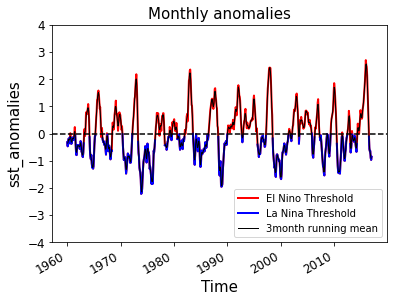

In [71]:
# 2.2 Visualize the computed Niño 3.4. 
# Calculate the averaged anomalies by (dim="lon","lat")
Monthly_anomalies=sst_anomalies.mean(dim=("lon","lat"))
# Plot the sst_anomalies.mean(dim=("lon","lat"))
line1=Monthly_anomalies.plot(color="red",linewidth=2,linestyle="-")
# Detect those sst_anomalies lower than "0", and create a new layer "masked_sample"
masked_sample = Monthly_anomalies.where(Monthly_anomalies < 0)
# Plot the "masked_sample" to get the "La Nina Threshold"
line2=masked_sample.plot(color="blue",linewidth=2,linestyle="-")
# Plot the Anomalies_rolling_3month.mean(dim="lon","lat")
line3=Anomalies_rolling_3month.mean(dim=("lon","lat")).plot(color="black",linewidth=1,linestyle="-")
plt.legend(labels=["El Nino Threshold","La Nina Threshold","3month running mean"])
# Add a auxiliary line "y=0"
plt.axhline(y=0,color="black",linestyle="--",linewidth=1.5)
plt.title("Monthly anomalies",fontsize=15)
plt.xlabel("Time",fontsize=15)
plt.ylabel("sst_anomalies",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(-4,4)
plt.show()

In [72]:
# 3. Explore a netCDF dataset
# Open a dataset
ds3 = xr.open_dataset("CESM2_200001-201412.nc", engine="netcdf4")
ds3

D:\Users\60918\anaconda3\lib\site-packages\xarray\conventions.py:512: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


<xarray.Dataset>
Dimensions:    (time: 180, lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
Dimensions without coordinates: nbnd
Data variables:
    tas        (time, lat, lon) float32 ...
    time_bnds  (time, nbnd) object ...
    lat_bnds   (lat, nbnd) float64 ...
    lon_bnds   (lon, nbnd) float64 ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    ...                     ...
    sub_experiment_id:      none
    table_id:               Amon
    tracking_id:            hdl:21.14100/a7278f6d-6a1b-4050-8f06-a8033604736a
    variable_id:            tas
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r11i1p1f1

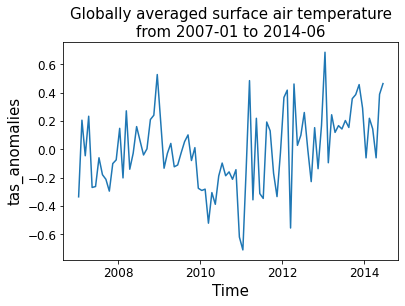

In [73]:
# 3.1 Plot a time series of a certain variable with monthly seasonal cycle removed.
# Choose a time range for the data and calculate the global "tas" means 
New_ds3=ds3.tas.mean(dim=("lon", "lat")).sel(time=slice("2007-01", "2014-06"))
# Group data by "Month"
group_data = New_ds3.groupby('time.month')

# Apply mean to grouped data, and then compute "tas_anomalies" with monthly seasonal cycle removed
tas_anomalies = group_data - group_data.mean(dim="time")
# Plot "tas_anomalies"
tas_anomalies.plot()
plt.title("Globally averaged surface air temperature\nfrom 2007-01 to 2014-06",fontsize=15)
plt.xlabel("Time",fontsize=15)
plt.ylabel("tas_anomalies",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

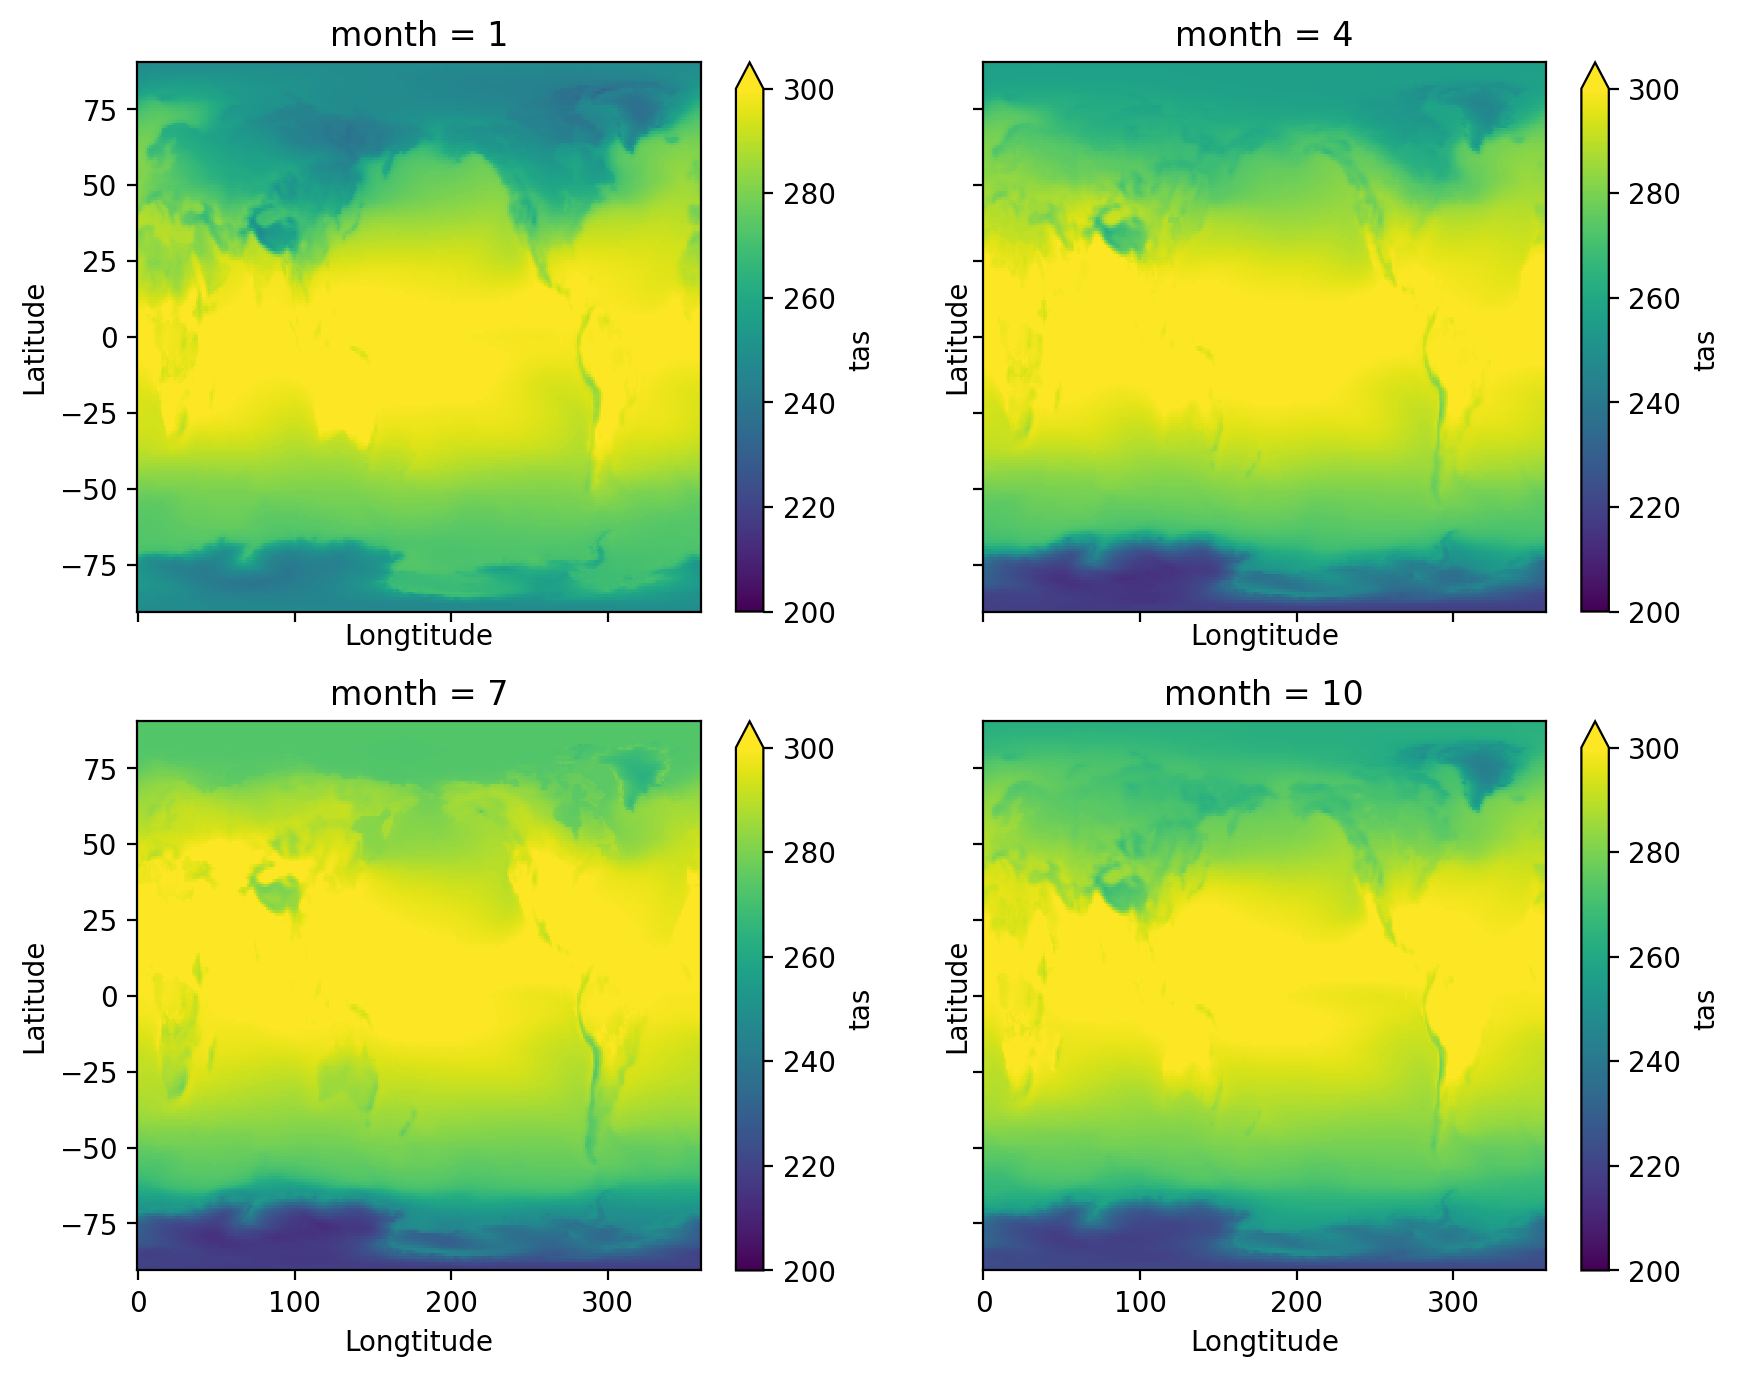

In [77]:
# 3.2.1 Figure Global tas in Month 1,4,7 and 10
# Group tas data by month and compute the means for each month
tas_month_mean = ds3.tas.sel(time=slice("2007-01", "2014-06")).groupby("time.month").mean()

# Use a "for" loop to subplot Month 1,4,7,10 in 4 panels
fig,ax=plt.subplots(2,2, figsize=(10,8),sharex="all",sharey="all",dpi=200)
ax=ax.flatten()
for i in range(4):
    ax[i]=plt.subplot(2,2,i+1)
    tas_month_mean[i*3,:,:].plot(vmin=200, vmax=300)
    plt.xlabel("Longtitude",fontsize=10)
    plt.ylabel("Latitude",fontsize=10)
plt.subplots_adjust(wspace=0.2,hspace=0.2)

D:\Users\60918\anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
D:\Users\60918\anaconda3\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
D:\Users\60918\anaconda3\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
D:\Users\60918\anaconda3\lib\site-packages\cartopy\crs.py:402: ShapelyDeprecationWarning: Iterati

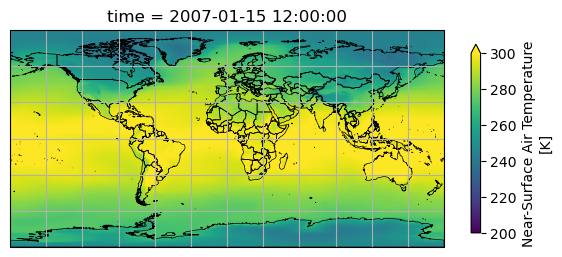

In [78]:
# 3.2.2 Figure Global tas in 2007-01
# Rechoose data in time="2007-01"
surface_T= ds3.tas.sel(time="2007-01")
# Create a figure object
plt.figure(figsize=(7,5), dpi=100)
# Create an axes with Orthographic projection style
proj = ccrs.PlateCarree() 
ax = plt.axes(projection=proj)
# Plot the global tas in 2007-01
surface_T.plot(ax=ax, transform=ccrs.PlateCarree(),
         vmin=200, vmax=300, cbar_kwargs={"shrink": 0.5})

# Add border lines over countries 
ax.add_feature(cfeature.NaturalEarthFeature(category="cultural",
                                           name="admin_0_countries",
                                           scale="50m",
                                           facecolor="none",
                                           edgecolor="black",
                                           linewidth=0.5))

# Add gridlines
gridline = ax.gridlines(crs=ccrs.PlateCarree())
# Manipulate latitude and longitude gridline numbers and spacing
gridline.ylocator = mticker.FixedLocator(np.arange(-90,91,30))
gridline.xlocator = mticker.FixedLocator(np.arange(-180, 181,30))

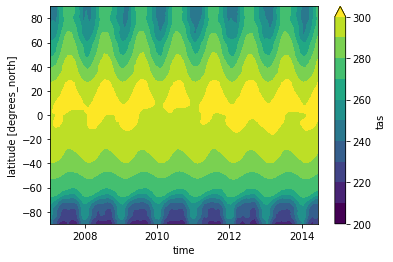

In [79]:
# 3.2.3 Figure a tas contourf for different latitudes from 2007-01 to 2014-06
ds3.tas.mean(dim="lon").sel(time=slice("2007-01", "2014-06")).plot.contourf(x="time", 
                                       levels=11, vmin=200, vmax=300)

D:\Users\60918\anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
D:\Users\60918\anaconda3\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
D:\Users\60918\anaconda3\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


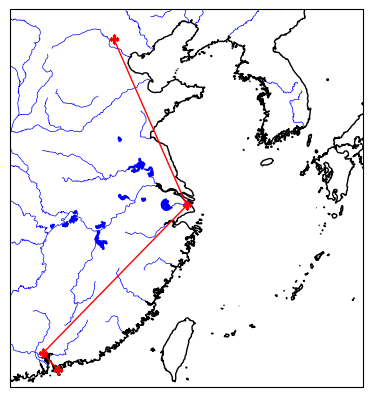

In [80]:
# 3.2.4 Find out the location of Beijing, Shanghai, HongKong and Guangzhou in the map
# Beijing=116.5E, 39.9N
# Shanghai=121.5E,31.2N
# HongKong=114.2E,22.3N
# Guangzhou=113.25E,23.13N
# Create 4 dictionaries to contain the latitudes and longtitudes of the 4 cities.
HongKong = dict(lon=114.2, lat=22.3)
Guangzhou = dict(lon=113.25, lat=23.13)
Shanghai=dict(lon=121.5, lat=31.2)
Beijing=dict(lon=116.5, lat=39.9)
lons = [HongKong["lon"], Guangzhou["lon"],Shanghai["lon"],Beijing["lon"]]
lats = [HongKong["lat"], Guangzhou["lat"],Shanghai["lat"],Beijing["lat"]]

# Make a layer to add some river messages
rivers= cfeature.NaturalEarthFeature("physical", "rivers_lake_centerlines", "10m")

# Create a figure object and choose Shanghai as the figure center
plt.figure(figsize=(7,5), dpi=100)
central_lon, central_lat = 121.5, 31.2

# Set Orthographic projection style and create an axes
proj = ccrs.Orthographic(central_lon, central_lat) 
ax = plt.axes(projection=proj)

# Set a plotting range
Range = [central_lon-10, central_lon+10, central_lat-10, central_lat+10]
ax.set_extent(Range)

# Add some features for lakes and rivers, using function add_feature()
ax.add_feature(cfeature.LAKES, edgecolor="blue", facecolor="blue",zorder=1)
ax.add_feature(rivers, facecolor="None", edgecolor="blue", linewidth=0.5)

# Add coastlines, using function coastlines()
ax.coastlines(resolution="10m")

# Add 4 points to show the locations of 4 cities
ax.plot(lons, lats, "rP-", linewidth=1,transform=ccrs.PlateCarree())

D:\Users\60918\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
D:\Users\60918\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
D:\Users\60918\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
D:\Users\60918\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.


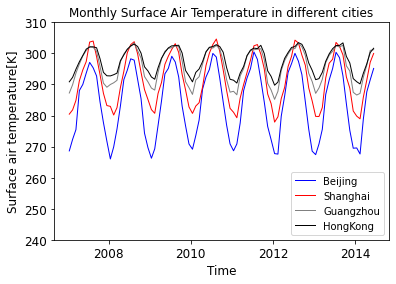

In [81]:
# 3.2.5 Draw Monthly tas in Beijing, Shanghai, Guangzhou and HongKong from 2007-01 to 2014-06
# Choose tas data of different cities, based on the latitudes and longtitudes
Beijing=ds3.tas.sel(time=slice("2007-01", "2014-06")).sel(lon=116.5,lat=39.9,method="nearest")
Shanghai=ds3.tas.sel(time=slice("2007-01", "2014-06")).sel(lon=121.5,lat=31.2,method="nearest")
HongKong=ds3.tas.sel(time=slice("2007-01", "2014-06")).sel(lon=114.2,lat=22.3,method="nearest")
Guangzhou=ds3.tas.sel(time=slice("2007-01", "2014-06")).sel(lon=113.25,lat=23.13,method="nearest")
# Plot tas data
Beijing.plot(color="blue",linewidth=1.0,linestyle="-")
Shanghai.plot(color="red",linewidth=1.0,linestyle="-")
Guangzhou.plot(color="grey",linewidth=1.0,linestyle="-")
HongKong.plot(color="black",linewidth=1.0,linestyle="-")
plt.legend(labels=["Beijing","Shanghai","Guangzhou","HongKong"],loc="lower right")
plt.title("Monthly Surface Air Temperature in different cities",fontsize=12)
plt.xlabel("Time",fontsize=12)
plt.ylabel("Surface air temperature[K]",fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(240,310)
plt.show()